In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
import networkx as nx
from qiskit.algorithms.optimizers import COBYLA
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.utils import algorithm_globals
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [3]:
# This code is part of Qiskit.
#
# (C) Copyright IBM 2021.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

"""Test QAOA ansatz from the library."""
from qiskit.circuit.quantumcircuit import QuantumCircuit
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz
from qiskit.circuit.library import HGate, RXGate, YGate, RYGate, RZGate
from qiskit.opflow import I, Y, Z
from qiskit.test import QiskitTestCase


class TestQAOAAnsatz(QiskitTestCase):
    """Test QAOAAnsatz."""

    def test_default_qaoa(self):
        """Test construction of the default circuit."""
        circuit = QAOAAnsatz(I, 1)

        parameters = circuit.parameters

        circuit = circuit.decompose()
        self.assertEqual(1, len(parameters))
        self.assertIsInstance(circuit.data[0][0], HGate)
        self.assertIsInstance(circuit.data[1][0], RXGate)

    def test_custom_initial_state(self):
        """Test circuit with a custom initial state."""
        initial_state = QuantumCircuit(1)
        initial_state.y(0)
        circuit = QAOAAnsatz(initial_state=initial_state, cost_operator=I, reps=1)

        parameters = circuit.parameters
        circuit = circuit.decompose()
        self.assertEqual(1, len(parameters))
        self.assertIsInstance(circuit.data[0][0], YGate)
        self.assertIsInstance(circuit.data[1][0], RXGate)

    def test_invalid_reps(self):
        """Test negative reps."""
        circuit = QAOAAnsatz(I, reps=-1)
        with self.assertRaises(AttributeError):
            _ = circuit.count_ops()

    def test_zero_reps(self):
        """Test zero reps."""
        circuit = QAOAAnsatz(I ^ 4, reps=0)
        reference = QuantumCircuit(4)
        reference.h(range(4))

        self.assertEqual(circuit.decompose(), reference)

    def test_custom_circuit_mixer(self):
        """Test circuit with a custom mixer as a circuit"""
        mixer = QuantumCircuit(1)
        mixer.ry(1, 0)
        circuit = QAOAAnsatz(cost_operator=I, reps=1, mixer_operator=mixer)

        parameters = circuit.parameters
        circuit = circuit.decompose()
        self.assertEqual(0, len(parameters))
        self.assertIsInstance(circuit.data[0][0], HGate)
        self.assertIsInstance(circuit.data[1][0], RYGate)

    def test_custom_operator_mixer(self):
        """Test circuit with a custom mixer as an operator."""
        mixer = Y
        circuit = QAOAAnsatz(cost_operator=I, reps=1, mixer_operator=mixer)

        parameters = circuit.parameters
        circuit = circuit.decompose()
        self.assertEqual(1, len(parameters))
        self.assertIsInstance(circuit.data[0][0], HGate)
        self.assertIsInstance(circuit.data[1][0], RYGate)

    def test_all_custom_parameters(self):
        """Test circuit with all custom parameters."""
        initial_state = QuantumCircuit(1)
        initial_state.y(0)
        mixer = Z

        circuit = QAOAAnsatz(
            cost_operator=I, reps=2, initial_state=initial_state, mixer_operator=mixer
        )

        parameters = circuit.parameters
        circuit = circuit.decompose()
        self.assertEqual(2, len(parameters))
        self.assertIsInstance(circuit.data[0][0], YGate)
        self.assertIsInstance(circuit.data[1][0], RZGate)
        self.assertIsInstance(circuit.data[2][0], RZGate)

    def test_configuration(self):
        """Test configuration checks."""
        mixer = QuantumCircuit(2)
        circuit = QAOAAnsatz(cost_operator=I, reps=1, mixer_operator=mixer)

        self.assertRaises(AttributeError, lambda: circuit.parameters)

    def test_rebuild(self):
        """Test how a circuit can be rebuilt."""
        circuit = QAOAAnsatz(cost_operator=Z ^ I)  # circuit with 2 qubits
        # force circuit to be built
        _ = circuit.parameters

        circuit.cost_operator = Z  # now it only has 1 qubit
        circuit.reps = 5  # and now 5 repetitions
        # rebuild the circuit
        _ = circuit.parameters
        self.assertEqual(1, circuit.num_qubits)
        self.assertEqual(10, circuit.num_parameters)

In [27]:
s= TestQAOAAnsatz()

In [28]:
s.test_default_qaoa()

Traceback (most recent call last):
  Cell In[28], line 1
    s.test_default_qaoa()
  Cell In[26], line 33 in test_default_qaoa
    self.assertIsInstance(circuit.data[1][0], RXGate)
  File /opt/conda/lib/python3.10/unittest/case.py:1269 in assertIsInstance
    self.fail(self._formatMessage(msg, standardMsg))
  File /opt/conda/lib/python3.10/unittest/case.py:675 in fail
    raise self.failureException(msg)
AssertionError: Instruction(name='PauliEvolution', num_qubits=1, num_clbits=0, params=[ParameterVectorElement(β[0])]) is not an instance of <class 'qiskit.circuit.library.standard_gates.rx.RXGate'>

Use %tb to get the full traceback.


In [59]:
"""Test construction of the default circuit."""
circuit = QAOAAnsatz(qubitOp, 1)
print(dir(circuit))




['__abstractmethods__', '__and__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iand__', '__init__', '__init_subclass__', '__ixor__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '__xor__', '_abc_impl', '_ancillas', '_append', '_appended_blocks', '_appended_entanglement', '_assign_calibration_parameters', '_assign_parameter', '_base_name', '_bounds', '_build', '_build_additional_layers', '_build_entanglement_layer', '_build_rotation_layer', '_calibrations', '_check_configuration', '_check_dups', '_clbit_indices', '_clbits', '_control_flow_scopes', '_convert_to_block', '_cost_operator', '_create_creg', '_create_qreg', '_cregs', '_data', '_entanglement', '_entanglement_blocks', '_entangler_maps', '_evolution', '_

In [11]:
from qiskit import Aer
#from qiskit.optimization.applications.ising import tsp
from qiskit_optimization.applications import Tsp
#from qiskit.aqua.algorithms import NumPyMinimumEigensolver, QAOA
from qiskit.algorithms.minimum_eigensolvers import QAOA , NumPyMinimumEigensolver
#from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
#from qiskit.optimization.problems import QuadraticProgram
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.primitives import Sampler
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz
from qiskit.quantum_info.operators import Operator # Generating a TSP instance of n cities
n = 3
num_qubits = n ** 2
tsp =Tsp.create_random_instance(n, seed=122)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

# Create a random TSP Hamiltonian
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print(qubitOp, offset)




distance
 [[ 0. 45. 33.]
 [45.  0. 53.]
 [33. 53.  0.]]
Problem name: TSP

Minimize
  45*x_0_0*x_1_1 + 45*x_0_0*x_1_2 + 33*x_0_0*x_2_1 + 33*x_0_0*x_2_2
  + 45*x_0_1*x_1_0 + 45*x_0_1*x_1_2 + 33*x_0_1*x_2_0 + 33*x_0_1*x_2_2
  + 45*x_0_2*x_1_0 + 45*x_0_2*x_1_1 + 33*x_0_2*x_2_0 + 33*x_0_2*x_2_1
  + 53*x_1_0*x_2_1 + 53*x_1_0*x_2_2 + 53*x_1_1*x_2_0 + 53*x_1_1*x_2_2
  + 53*x_1_2*x_2_0 + 53*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2

-826.0 * IIIIIIIIZ
- 826.0 * IIIIIIIZI
- 826.0 * IIIIIIZII
- 836.0 * IIIIIZIII
- 836.0 * IIIIZIIII
- 836.0 * IIIZIIIII
- 830.0 * IIZIIIIII
- 830.0 * IZIIIIIII
- 830.0 * ZIIIIIIII
+ 393.5 * IIIIIIIZZ
+ 393.5 * IIIIIIZIZ
+ 393.5 * IIIIIIZZI
+ 393.5 * IIIIIZIIZ
+

In [16]:
from qiskit import QuantumCircuit
import numpy as np
# The below code is the implementation for QAOA+ Problem Independent Appended Layer the phase angles are set to be 
# random between pi/2 and -pi/2. (phase parameter can be changed)
#I n order to run QAOA+ this layer must be added after simple qaoa layer.
#9 qubit for 3 node tsp and 16 for 4 node tsp 




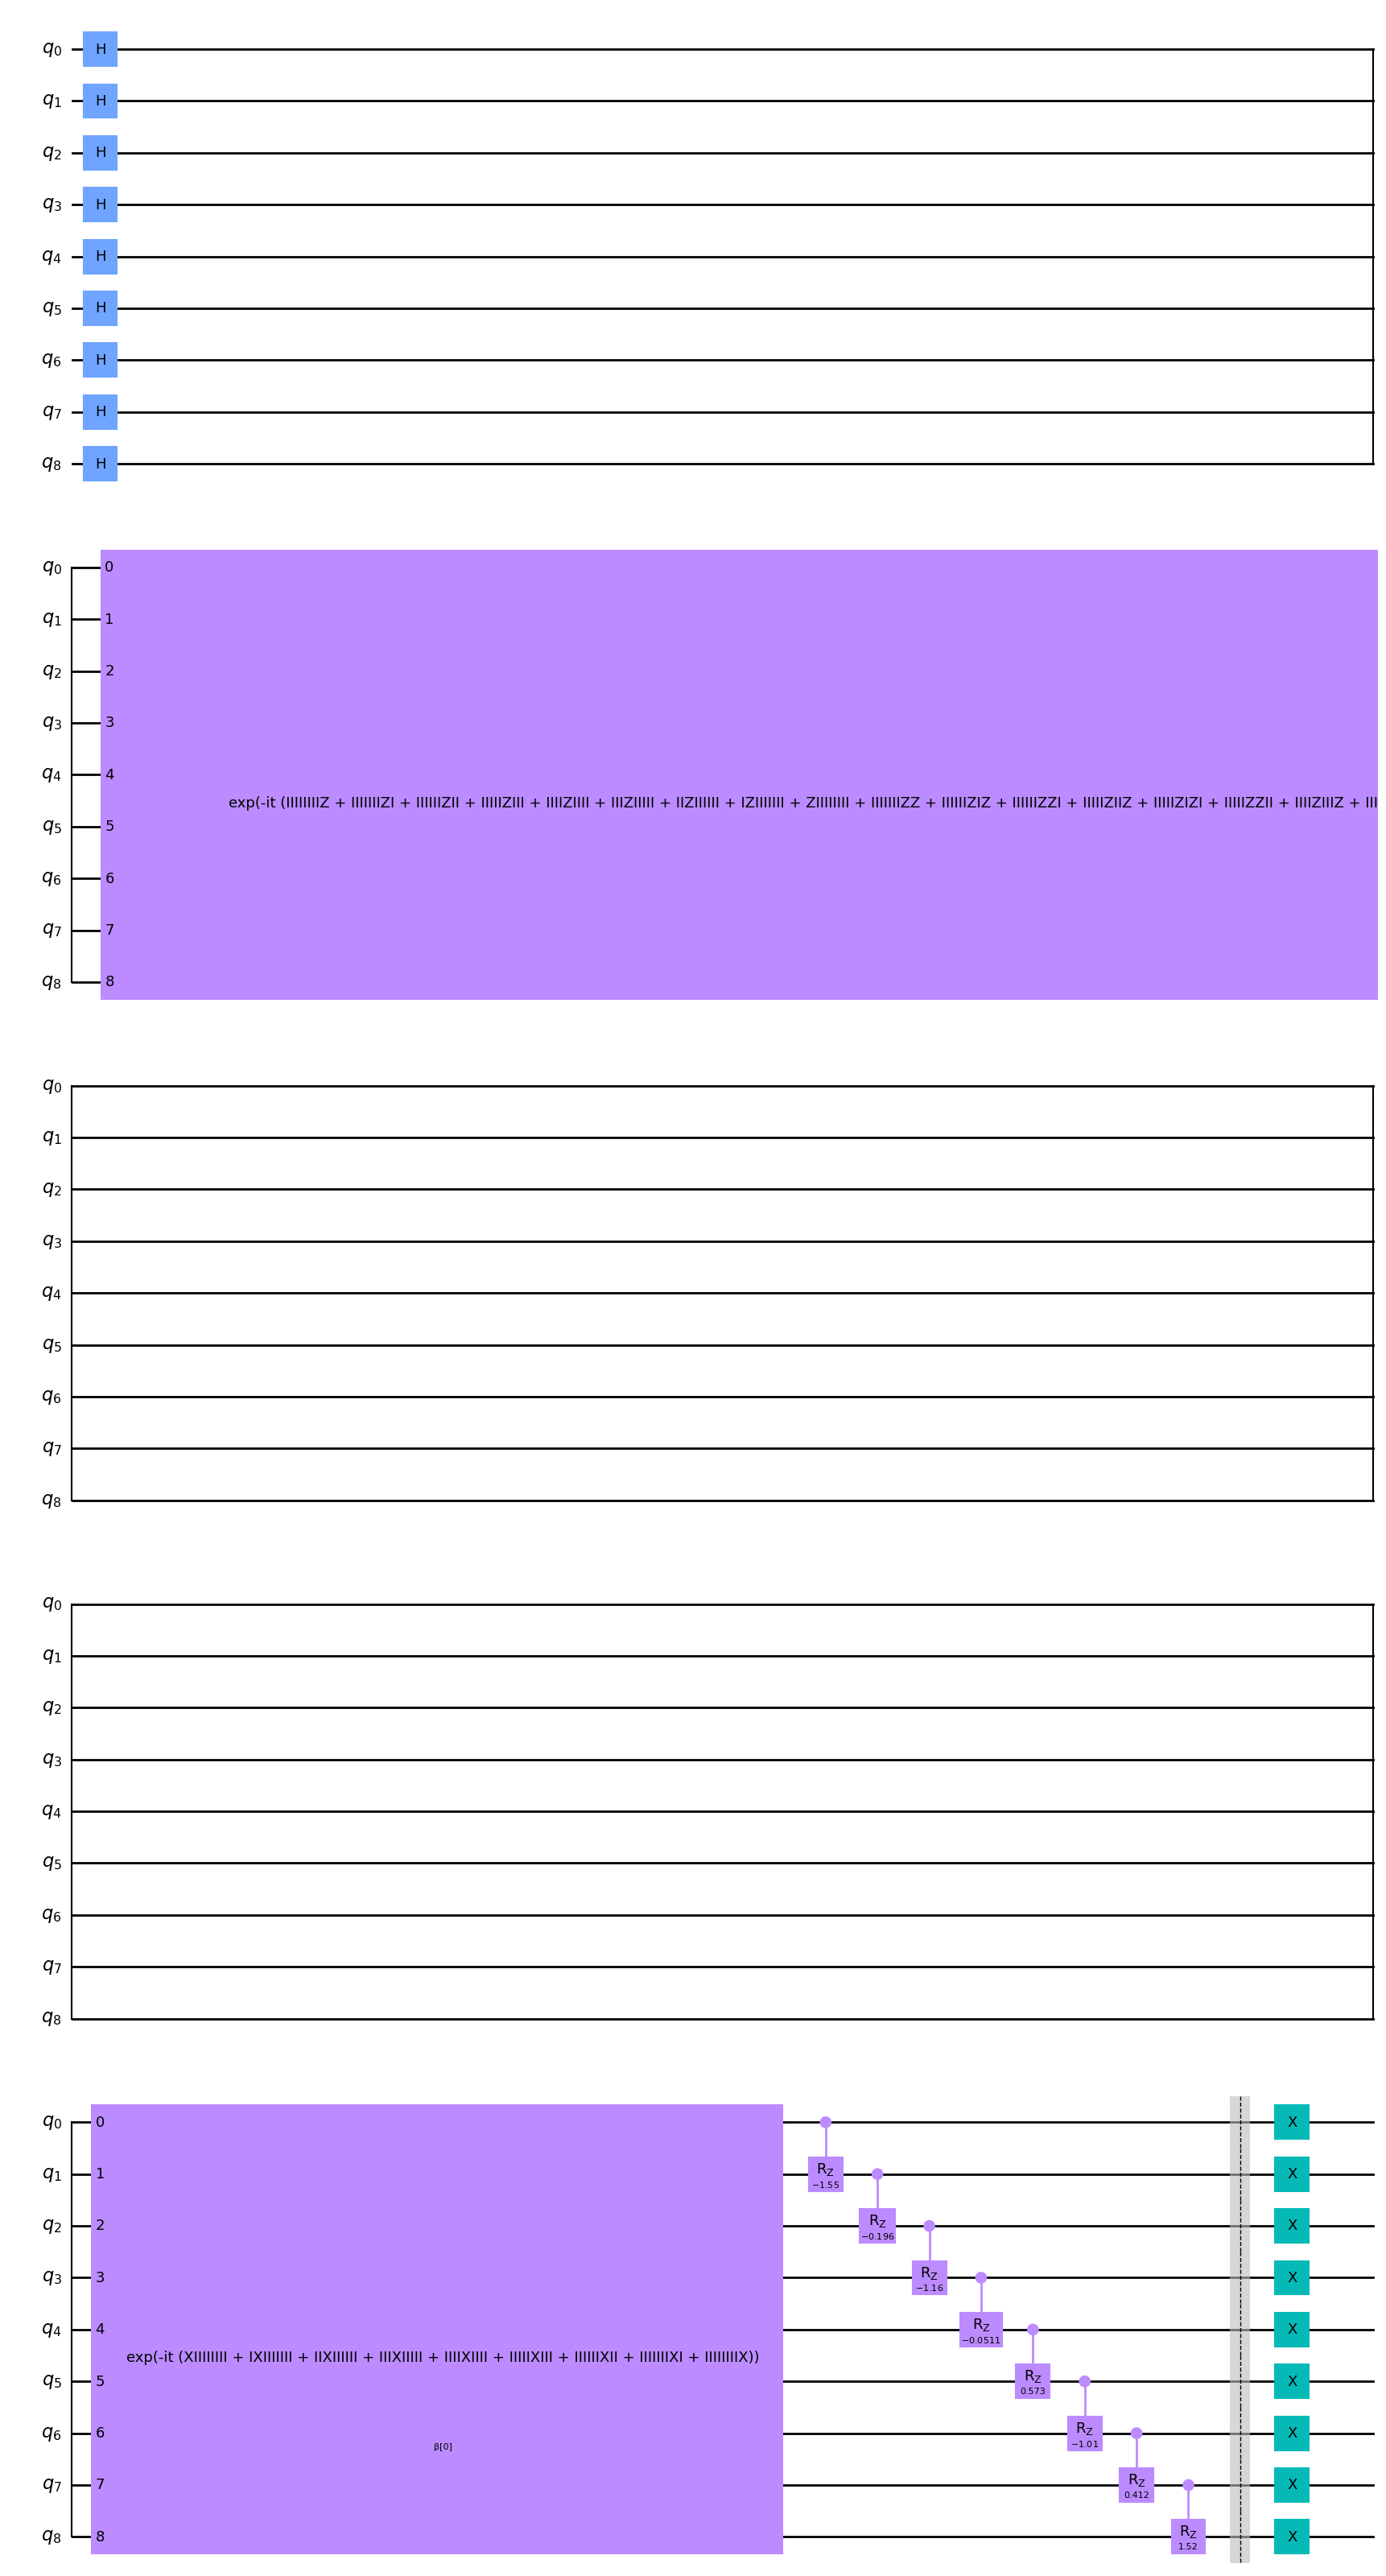

In [19]:

circuit = QAOAAnsatz( cost_operator=qubitOp, reps=1)
circuit =circuit.decompose()
circuit.draw()
for i in range(num_qubits - 1):
        random_param = np.random.uniform(low=-(0.5*np.pi), high=0.5*np.pi)
        circuit.crz(random_param, i, i+1)

circuit.barrier()
# Apply X gates to all qubits
circuit.x(range(num_qubits))
circuit.draw()